In [2]:
import cv2
import numpy as np
from urllib import request 
import matplotlib.pyplot as plt

In [3]:
url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/bad_rect.png'
fstr = 'bad_rect.png'
request.urlretrieve(url,fstr)
print('saved ok : bad_rect.png')

saved ok : bad_rect.png


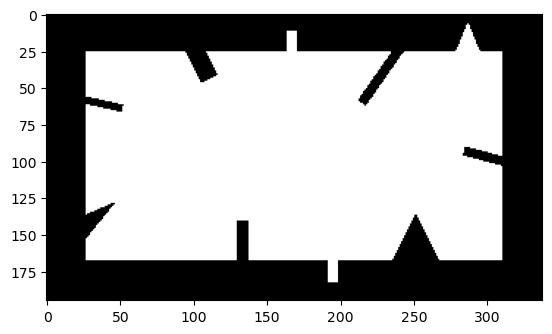

In [37]:
img_ori = cv2.imread('./bad_rect.png')
img = img_ori.copy()
img2 = img_ori.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold, binary_img = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img, cmap='gray')
plt.show()

1307.528998374939 65.37644991874696


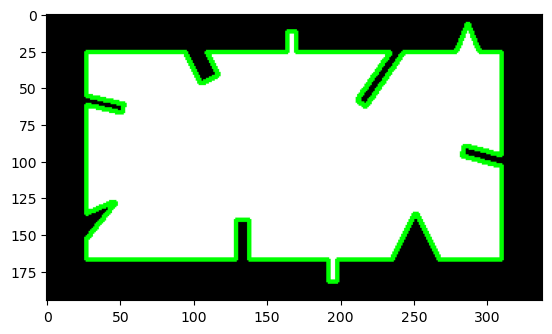

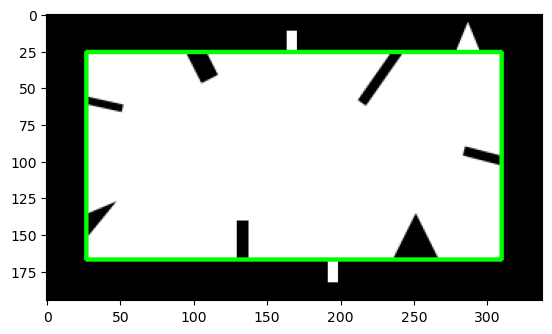

In [38]:
contours, hierachy = cv2.findContours(binary_img,
                                      cv2.RETR_EXTERNAL,
                                      cv2.CHAIN_APPROX_SIMPLE)
cnt0 = contours[0]


### 특정 오차범위를 만족하는 approxed contour를 찾으려면
### cv2.arclength()를 이용  ->  이때 오차범위에 들어가는 값은 '둘레'
app_rate = 0.05
epsilon = app_rate * cv2.arcLength(cnt0, True)
print(cv2.arcLength(cnt0, True), epsilon)

### target contour / 오차범위 / closed 유무
approx = cv2.approxPolyDP(cnt0, epsilon, True)

cv2.drawContours(img_ori, [cnt0], -1, (0,255,0), 2)
cv2.drawContours(img, [approx], -1, (0,255,0), 2)

plt.figure()
plt.imshow(img_ori[...,::-1])

plt.figure()
plt.imshow(img[...,::-1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(195, 338, 3)


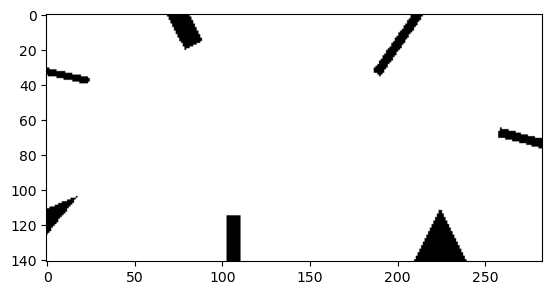

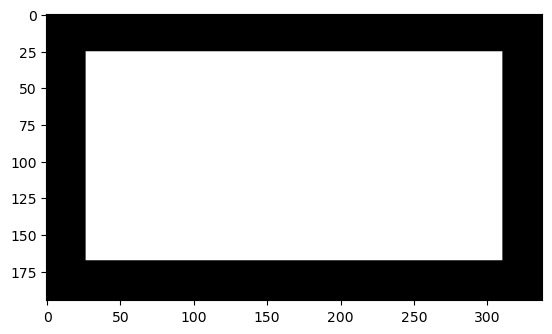

In [45]:
mask = np.zeros(img2.shape)
mask = cv2.rectangle(mask,
                     (310, 167),
                     (27,  26),
                     (255,255,255),
                     -1)

extracted_box = img2 * mask
print(extracted_box.shape)

contours, hierachy = cv2.finContours(extracted_box)

plt.figure()
plt.imshow(extracted_box[26:167, 27:310])

plt.figure()
plt.imshow(mask)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(195, 338, 3)


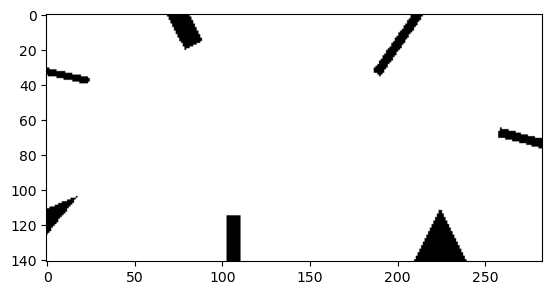

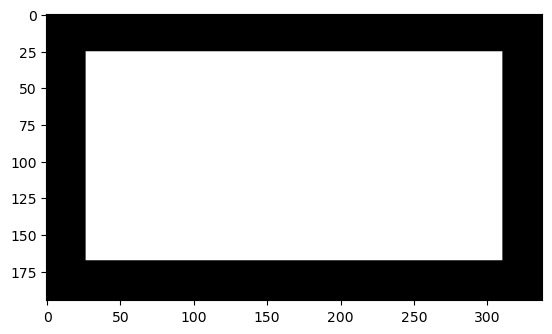

In [ ]:
mask = np.zeros(img2.shape)
mask = cv2.rectangle(mask,
                     (310, 167),
                     (27,  26),
                     (255,255,255),
                     -1)

extracted_box = img2 * mask
print(extracted_box.shape)



plt.figure()
plt.imshow(extracted_box[26:167, 27:310])

plt.figure()
plt.imshow(mask)
plt.show()

In [29]:
approx

array([[[310,  26]],

       [[ 27,  26]],

       [[ 27, 167]],

       [[310, 167]]], dtype=int32)